<a href="https://colab.research.google.com/github/Azimoj/TensorFlow/blob/main/Tf_neuralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=pAhPiF3yiXI&list=PLhhyoLH6IjfxVOdVC1P1L5z5azs0XjMsb&index=3

In [ ]:
import os
# to ignore information message from tensorflow
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import tensorflow as tf
from tensorflow import keras
# keras is higher level of API to building NN
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
## mnist: image of digit number from 0-9

In [ ]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

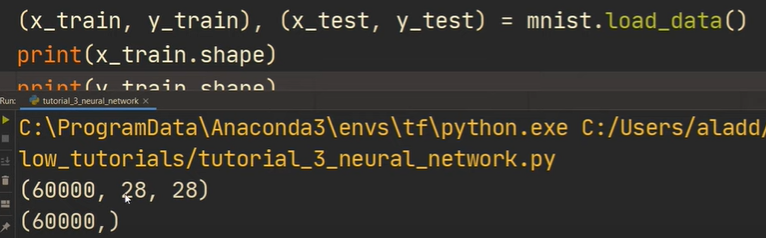

we have 60000 images  where are 28 by 28 and we are going to send them in Neurl Network so we need to flatten them so that we only have one long columns with those feature values by using reshape.

In [ ]:
x_train = x_train.reshape(-1, 28 * 28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype("float32") / 255.0
# -1 means to keep whatever the value is and on that dimension (60000)
# puting float32 to minimize some computation
# and for normalize them between (0,1) so we are deviding them by 255 for faster training

In [ ]:
# Sequential API (Very convenient, not very flexible), allow have one input and one output
model = keras.Sequential(
    [
        keras.Input(shape=(28 * 28)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(10),
    ]
)

model = keras.Sequential()
model.add(keras.Input(shape=(784)))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(256, activation="relu", name="my_layer"))
model.add(layers.Dense(10))

# Functional API (A bit more flexible)
inputs = keras.Input(shape=(784))
x = layers.Dense(512, activation="relu", name="first_layer")(inputs)
x = layers.Dense(256, activation="relu", name="second_layer")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"],
)

model.fit(x_train, y_train, batch_size=32, epochs=5, verbose=2)
model.evaluate(x_test, y_test, batch_size=32, v